# What is GIS:
* **Geographic information system** typically refers to applications and software   used to create spatial data and investigate spatial relationships between data
* **Geographic information Science** is the framework we use to ask questions about the spatial relationship between data
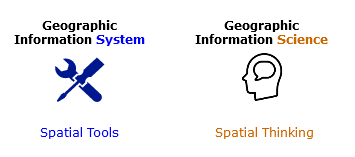

* Example applications: would be predicting the effects of climate change(rising sea levels) on low laying areas(Elevation) that would be application of geopgraphic information science and the technology and software used to do these predictions would be geographic information systems

# Data types within GIS:
* There are two kinds of data types you can find in GIS:
* 1. Spatial: this is data already containing geoprapghic information
      * Shapefiles: .zip( made from 3 or more files. common with .shp to identify them)
      * KML files:.kml or .kmz 
      * Geojson: .geojson
      * image files: .jpg,.png and .tiff

* 2. Non-spatial: data with no geographic information
     * Excel spreadsheets: .xlsx, .xls
     * CSV:.csv
     * json files: .json
     * dbase database files: .dbf
     
* This is for when non-spatial data has information like zipcodes,addresses,city names or logitude/latitude coordinates, these can be turned into spatial data. Distinction is non-spatial data will only show up as tables in GIS applications

# Spatial Data Formats
There are several spatial data models that you may encounter as you work with geo data. Geodata formats are commonly divided into two types, **vector data** or a **raster data**. In GIS,** discrete data means that the data has a fixed location**.**Continuous data in GIS does not have well defined or no boundary at all**, the most common example is elevation. The graphic below shows how vector data and raster data formats can represent continuous or discrete data

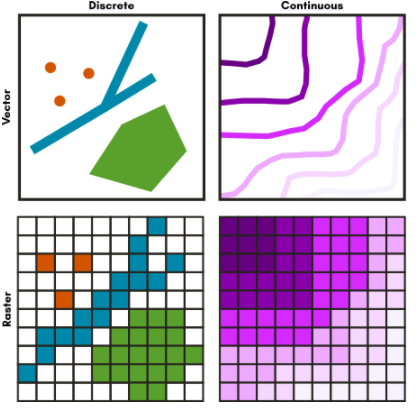

In [4]:
#Import Libraries
import geopandas as gpd #read geojson files
import matplotlib.pyplot as plt # to give more power to your figures (plots)
import contextily as ctx # to provide basemaps 

In [5]:
# Import Data On hispani/Latin origins by race
gdf = gpd.read_file('/content/acs2019_5yr_B03002_14000US06037534001.geojson') # read geojson file 

In [6]:
# Data Exploration
gdf.shape # get number of rows and columns

(2347, 45)

In [7]:
gdf.head(3) # see first 3 rows of the data and see the data

,geoid,name,B03002001,"B03002001, Error",B03002002,"B03002002, Error",B03002003,"B03002003, Error",B03002004,"B03002004, Error",B03002005,"B03002005, Error",B03002006,"B03002006, Error",B03002007,"B03002007, Error",B03002008,"B03002008, Error",B03002009,"B03002009, Error",B03002010,"B03002010, Error",B03002011,"B03002011, Error",B03002012,"B03002012, Error",B03002013,"B03002013, Error",B03002014,"B03002014, Error",B03002015,"B03002015, Error",B03002016,"B03002016, Error",B03002017,"B03002017, Error",B03002018,"B03002018, Error",B03002019,"B03002019, Error",B03002020,"B03002020, Error",B03002021,"B03002021, Error",geometry
0,05000US06037,"Los Angeles County, CA",10081570.0,0.0,5193136.0,0.0,2641770.0,1343.0,790252.0,2958.0,20831.0,1021.0,1454769.0,3676.0,24597.0,752.0,32413.0,2235.0,228504.0,5193.0,12628.0,1192.0,215876.0,4867.0,4888434.0,0.0,2526673.0,20454.0,30226.0,1992.0,52562.0,3040.0,18452.0,1143.0,3123.0,567.0,2083135.0,21995.0,174263.0,4915.0,103325.0,3658.0,70938.0,2605.0,"MULTIPOLYGON (((-118.70339 34.16859, -118.7033..."
1,14000US06037101110,"Census Tract 1011.10, Los Angeles, CA",4283.0,443.0,3095.0,354.0,2616.0,306.0,19.0,15.0,3.0,6.0,331.0,142.0,3.0,6.0,8.0,13.0,115.0,71.0,0.0,12.0,115.0,71.0,1188.0,414.0,731.0,310.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,383.0,311.0,74.0,52.0,34.0,28.0,40.0,46.0,"MULTIPOLYGON (((-118.30229 34.25870, -118.3009..."
2,14000US06037101122,"Census Tract 1011.22, Los Angeles, CA",3405.0,334.0,3258.0,344.0,2882.0,358.0,74.0,102.0,15.0,24.0,220.0,156.0,0.0,12.0,0.0,12.0,67.0,65.0,0.0,12.0,67.0,65.0,147.0,86.0,99.0,66.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,48.0,55.0,0.0,12.0,0.0,12.0,0.0,12.0,"MULTIPOLYGON (((-118.30334 34.27371, -118.3033..."


In [8]:
gdf.sample() # take a random sample of one row

,geoid,name,B03002001,"B03002001, Error",B03002002,"B03002002, Error",B03002003,"B03002003, Error",B03002004,"B03002004, Error",B03002005,"B03002005, Error",B03002006,"B03002006, Error",B03002007,"B03002007, Error",B03002008,"B03002008, Error",B03002009,"B03002009, Error",B03002010,"B03002010, Error",B03002011,"B03002011, Error",B03002012,"B03002012, Error",B03002013,"B03002013, Error",B03002014,"B03002014, Error",B03002015,"B03002015, Error",B03002016,"B03002016, Error",B03002017,"B03002017, Error",B03002018,"B03002018, Error",B03002019,"B03002019, Error",B03002020,"B03002020, Error",B03002021,"B03002021, Error",geometry
190,14000US06037123902,"Census Tract 1239.02, Los Angeles, CA",2668.0,271.0,1905.0,195.0,1392.0,205.0,86.0,76.0,0.0,12.0,371.0,113.0,0.0,12.0,8.0,13.0,48.0,50.0,0.0,12.0,48.0,50.0,763.0,176.0,371.0,222.0,0.0,12.0,0.0,12.0,0.0,12.0,9.0,14.0,309.0,152.0,74.0,78.0,38.0,62.0,36.0,41.0,"MULTIPOLYGON (((-118.39651 34.17889, -118.3965..."


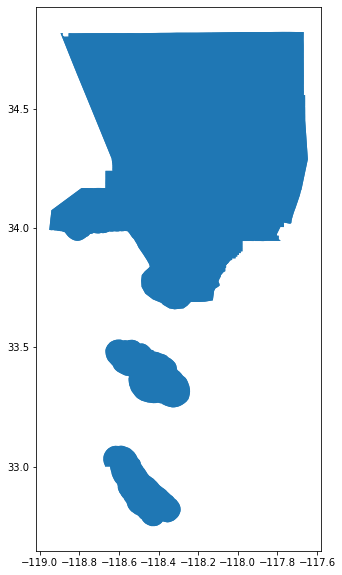

In [9]:
# Plot data
gdf.plot(figsize=(10,10))

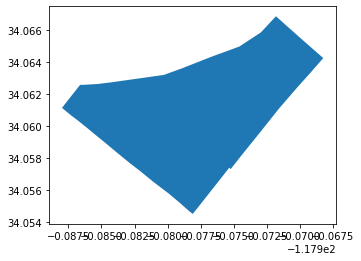

In [10]:
# plot a random sample of the data
gdf.sample().plot()

In [11]:
# Get datatypes of each column
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 2347 entries, 0 to 2346
Data columns (total 45 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   geoid             2347 non-null   object  
 1   name              2347 non-null   object  
 2   B03002001         2347 non-null   float64 
 3   B03002001, Error  2347 non-null   float64 
 4   B03002002         2347 non-null   float64 
 5   B03002002, Error  2347 non-null   float64 
 6   B03002003         2347 non-null   float64 
 7   B03002003, Error  2347 non-null   float64 
 8   B03002004         2347 non-null   float64 
 9   B03002004, Error  2347 non-null   float64 
 10  B03002005         2347 non-null   float64 
 11  B03002005, Error  2347 non-null   float64 
 12  B03002006         2347 non-null   float64 
 13  B03002006, Error  2347 non-null   float64 
 14  B03002007         2347 non-null   float64 
 15  B03002007, Error  2347 non-null   float64 
 16  B03002008       

In [12]:
# GoeID in American Counties has a meaning
##state-county-track-block group: this is an example of geographic hierachy
gdf.geoid.head()

0          05000US06037
1    14000US06037101110
2    14000US06037101122
3    14000US06037101210
4    14000US06037101220
Name: geoid, dtype: object

In [13]:
# First row in the data is for the entire county so we must remove this row
gdf.drop([0],inplace=True)

In [14]:
gdf.head(2)

,geoid,name,B03002001,"B03002001, Error",B03002002,"B03002002, Error",B03002003,"B03002003, Error",B03002004,"B03002004, Error",B03002005,"B03002005, Error",B03002006,"B03002006, Error",B03002007,"B03002007, Error",B03002008,"B03002008, Error",B03002009,"B03002009, Error",B03002010,"B03002010, Error",B03002011,"B03002011, Error",B03002012,"B03002012, Error",B03002013,"B03002013, Error",B03002014,"B03002014, Error",B03002015,"B03002015, Error",B03002016,"B03002016, Error",B03002017,"B03002017, Error",B03002018,"B03002018, Error",B03002019,"B03002019, Error",B03002020,"B03002020, Error",B03002021,"B03002021, Error",geometry
1,14000US06037101110,"Census Tract 1011.10, Los Angeles, CA",4283.0,443.0,3095.0,354.0,2616.0,306.0,19.0,15.0,3.0,6.0,331.0,142.0,3.0,6.0,8.0,13.0,115.0,71.0,0.0,12.0,115.0,71.0,1188.0,414.0,731.0,310.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,383.0,311.0,74.0,52.0,34.0,28.0,40.0,46.0,"MULTIPOLYGON (((-118.30229 34.25870, -118.3009..."
2,14000US06037101122,"Census Tract 1011.22, Los Angeles, CA",3405.0,334.0,3258.0,344.0,2882.0,358.0,74.0,102.0,15.0,24.0,220.0,156.0,0.0,12.0,0.0,12.0,67.0,65.0,0.0,12.0,67.0,65.0,147.0,86.0,99.0,66.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,48.0,55.0,0.0,12.0,0.0,12.0,0.0,12.0,"MULTIPOLYGON (((-118.30334 34.27371, -118.3033..."


In [15]:
# columns
gdf.columns

Index(['geoid', 'name', 'B03002001', 'B03002001, Error', 'B03002002',
       'B03002002, Error', 'B03002003', 'B03002003, Error', 'B03002004',
       'B03002004, Error', 'B03002005', 'B03002005, Error', 'B03002006',
       'B03002006, Error', 'B03002007', 'B03002007, Error', 'B03002008',
       'B03002008, Error', 'B03002009', 'B03002009, Error', 'B03002010',
       'B03002010, Error', 'B03002011', 'B03002011, Error', 'B03002012',
       'B03002012, Error', 'B03002013', 'B03002013, Error', 'B03002014',
       'B03002014, Error', 'B03002015', 'B03002015, Error', 'B03002016',
       'B03002016, Error', 'B03002017', 'B03002017, Error', 'B03002018',
       'B03002018, Error', 'B03002019', 'B03002019, Error', 'B03002020',
       'B03002020, Error', 'B03002021', 'B03002021, Error', 'geometry'],
      dtype='object')

In [16]:
# Working only on data about Non-Hispanic races and Hispanic
columns_to_keep = ['geoid',
 'name',
 'B03002001',
 'B03002002',
 'B03002003',
 'B03002004',
 'B03002005',
 'B03002006',
 'B03002007',
 'B03002008',
 'B03002009',
 'B03002012',
 'geometry']
gdf = gdf[columns_to_keep]

In [17]:
gdf.shape

(2346, 13)

In [18]:
# Rename the columns
gdf.columns = ['geoid',
 'name',
 'Total',
 'Non Hispanic',
 'Non Hispanic White',
 'Non Hispanic Black',
 'Non Hispanic American Indian and Alaska Native',
 'Non Hispanic Asian',
 'Non Hispanic Native Hawaiian and Other Pacific Islander',
 'Non Hispanic Some other race',
 'Non Hispanic Two or more races',
 'Hispanic',
 'geometry']

In [21]:
gdf.columns

Index(['geoid', 'name', 'Total', 'Non Hispanic', 'Non Hispanic White',
       'Non Hispanic Black', 'Non Hispanic American Indian and Alaska Native',
       'Non Hispanic Asian',
       'Non Hispanic Native Hawaiian and Other Pacific Islander',
       'Non Hispanic Some other race', 'Non Hispanic Two or more races',
       'Hispanic', 'geometry'],
      dtype='object')

In [26]:
# Important after any Feature Engineering to perform a Data integrity check. Make sure nothing in the data has changed 
sample = gdf.sample()
assert sample.iloc[0]['Total'] == sample.iloc[0]['Non Hispanic'] + sample.iloc[0]['Hispanic']

In [29]:
Nonhis = sample.iloc[0]['Non Hispanic White'] + sample.iloc[0]['Non Hispanic Black'] + sample.iloc[0]['Non Hispanic American Indian and Alaska Native'] + sample.iloc[0]['Non Hispanic Asian'] + sample.iloc[0]['Non Hispanic Native Hawaiian and Other Pacific Islander'] + sample.iloc[0]['Non Hispanic Some other race'] + sample.iloc[0]['Non Hispanic Two or more races'] + sample.iloc[0]['Hispanic']
assert sample.iloc[0]['Total'] == Nonhis


# Sample Statistics and Plots

In [93]:
from ipywidgets import widgets
def des(column):
  return gdf[column].describe(),gdf[column].plot(kind= 'box')
widgets.interact(des,column=gdf.columns);

interactive(children=(Dropdown(description='column', options=('geoid', 'name', 'Total', 'Non Hispanic', 'Non H…

# Creating Plots
* Before visualizing we need to be able to do EDA and Feature engineering

In [102]:
# Produce Plots for data
Numerica_data  = ['Total','Non Hispanic','Non Hispanic White','Non Hispanic Black','Non Hispanic American Indian and Alaska Native',
 'Non Hispanic Asian','Non Hispanic Native Hawaiian and Other Pacific Islander','Non Hispanic Some other race','Non Hispanic Two or more races','Hispanic']
@widgets.interact(column=Numerica_data)
def ploty(column):
  gdf[column].hist(figsize=(12,5),bins=100)


interactive(children=(Dropdown(description='column', options=('Total', 'Non Hispanic', 'Non Hispanic White', '…

In [67]:
# Sort your Data 
sort_gdf = gdf.sort_values(by = 'Total', ascending=False)

In [115]:
@widgets.interact(num=(5,2346,10),race=Numerica_data)
def maps(num,race):
  sort_gdf.head(num).plot(figsize=(10,10),column=race,cmap='plasma',legend=True)

interactive(children=(IntSlider(value=1175, description='num', max=2346, min=5, step=10), Dropdown(description…

In [123]:
#Filtering Data
@widgets.interact(col=Numerica_data)
def no_peeps(col):
  print('There are ' + str(len(gdf[gdf[col]==0])) + ' census tracts with no {} people'.format(col))
  gdf[gdf[col]==0].plot(color='green')



interactive(children=(Dropdown(description='col', options=('Total', 'Non Hispanic', 'Non Hispanic White', 'Non…

In [124]:
# data comparison can only work properly if we normalize the data within the same range so that we can compare properly between them
# create a new column, and populate it with normalized data to get the percent of total value
gdf['Percent Non Hispanic'] = gdf['Non Hispanic']/gdf['Total']*100
gdf['Percent Hispanic'] = gdf['Hispanic']/gdf['Total']*100
gdf['Percent Non Hispanic White'] = gdf['Non Hispanic White']/gdf['Total']*100
gdf['Percent Non Hispanic Black'] = gdf['Non Hispanic Black']/gdf['Total']*100
gdf['Percent Non Hispanic American Indian and Alaska Native'] = gdf['Non Hispanic American Indian and Alaska Native']/gdf['Total']*100
gdf['Percent Non Hispanic Asian'] = gdf['Non Hispanic Asian']/gdf['Total']*100
gdf['Percent Non Hispanic Native Hawaiian and Other Pacific Islander'] = gdf['Non Hispanic Native Hawaiian and Other Pacific Islander']/gdf['Total']*100
gdf['Percent Non Hispanic Some other race'] = gdf['Non Hispanic Some other race']/gdf['Total']*100
gdf['Percent Non Hispanic Two or more races'] = gdf['Non Hispanic Two or more races']/gdf['Total']*100

In [125]:
gdf.head()

,geoid,name,Total,Non Hispanic,Non Hispanic White,Non Hispanic Black,Non Hispanic American Indian and Alaska Native,Non Hispanic Asian,Non Hispanic Native Hawaiian and Other Pacific Islander,Non Hispanic Some other race,Non Hispanic Two or more races,Hispanic,geometry,Percent Non Hispanic,Percent Hispanic,Percent Non Hispanic White,Percent Non Hispanic Black,Percent Non Hispanic American Indian and Alaska Native,Percent Non Hispanic Asian,Percent Non Hispanic Native Hawaiian and Other Pacific Islander,Percent Non Hispanic Some other race,Percent Non Hispanic Two or more races
1,14000US06037101110,"Census Tract 1011.10, Los Angeles, CA",4283.0,3095.0,2616.0,19.0,3.0,331.0,3.0,8.0,115.0,1188.0,"MULTIPOLYGON (((-118.30229 34.25870, -118.3009...",72.262433,27.737567,61.078683,0.443614,0.070044,7.728228,0.070044,0.186785,2.685034
2,14000US06037101122,"Census Tract 1011.22, Los Angeles, CA",3405.0,3258.0,2882.0,74.0,15.0,220.0,0.0,0.0,67.0,147.0,"MULTIPOLYGON (((-118.30334 34.27371, -118.3033...",95.682819,4.317181,84.640235,2.173275,0.440529,6.461087,0.000000,0.000000,1.967695
3,14000US06037101210,"Census Tract 1012.10, Los Angeles, CA",6347.0,3731.0,2986.0,198.0,0.0,486.0,0.0,47.0,14.0,2616.0,"MULTIPOLYGON (((-118.29945 34.25598, -118.2979...",58.783677,41.216323,47.045848,3.119584,0.000000,7.657161,0.000000,0.740507,0.220577
4,14000US06037101220,"Census Tract 1012.20, Los Angeles, CA",3702.0,2338.0,1812.0,87.0,0.0,341.0,0.0,0.0,98.0,1364.0,"MULTIPOLYGON (((-118.28593 34.25227, -118.2859...",63.155051,36.844949,48.946515,2.350081,0.000000,9.211237,0.000000,0.000000,2.647218
5,14000US06037101300,"Census Tract 1013, Los Angeles, CA",3884.0,3587.0,3126.0,205.0,0.0,194.0,0.0,0.0,62.0,297.0,"MULTIPOLYGON (((-118.27822 34.25068, -118.2782...",92.353244,7.646756,80.484037,5.278064,0.000000,4.994851,0.000000,0.000000,1.596292


# creating chlorepleth maps with geopandas 

In [129]:
gdf.columns

Index(['geoid', 'name', 'Total', 'Non Hispanic', 'Non Hispanic White',
       'Non Hispanic Black', 'Non Hispanic American Indian and Alaska Native',
       'Non Hispanic Asian',
       'Non Hispanic Native Hawaiian and Other Pacific Islander',
       'Non Hispanic Some other race', 'Non Hispanic Two or more races',
       'Hispanic', 'geometry', 'Percent Non Hispanic', 'Percent Hispanic',
       'Percent Non Hispanic White', 'Percent Non Hispanic Black',
       'Percent Non Hispanic American Indian and Alaska Native',
       'Percent Non Hispanic Asian',
       'Percent Non Hispanic Native Hawaiian and Other Pacific Islander',
       'Percent Non Hispanic Some other race',
       'Percent Non Hispanic Two or more races'],
      dtype='object')

In [134]:
@widgets.interact(X=gdf.columns,S=['equal_interval','quantiles'])
def perc_plot(X,S):
  gdf.plot(figsize=(12,10),
                 column='Percent Hispanic',
                 legend=True, 
                 scheme=S)

interactive(children=(Dropdown(description='X', options=('geoid', 'name', 'Total', 'Non Hispanic', 'Non Hispan…

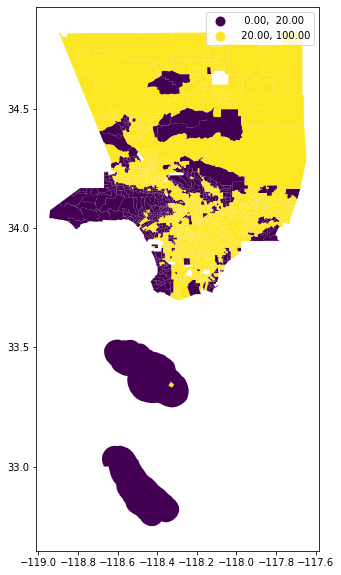

In [143]:
gdf.plot(figsize=(12,10),
                 column='Percent Hispanic',
                 legend=True, 
                 scheme='user_defined',
                 classification_kwds={'bins':[20,100]}) # this is researcher defined spread of data

Text(0.5, 1.0, 'Percent Non Hispanic Black')

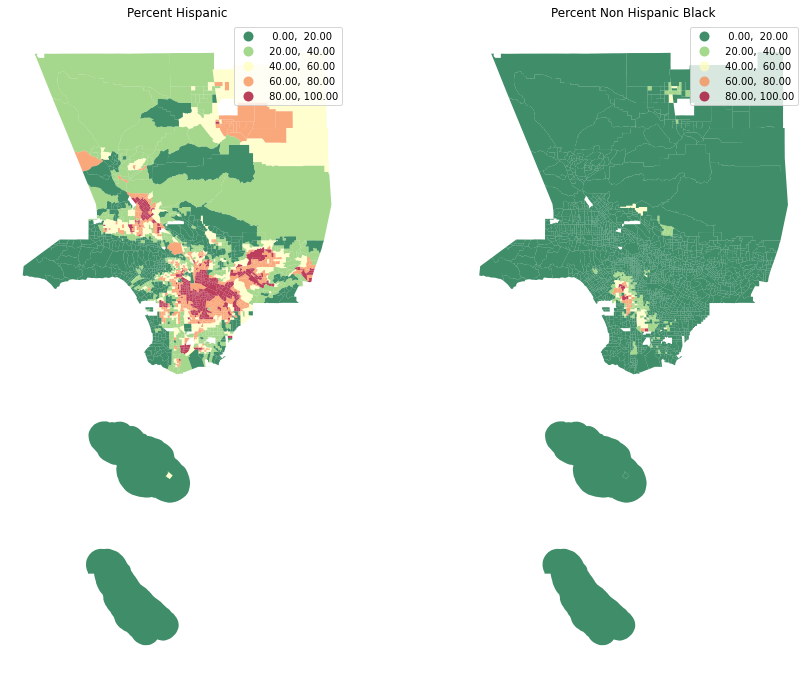

In [142]:
# COmparing two Race Groups Geopgraphical Population Size
fig, axs = plt.subplots(1, 2, figsize=(15, 12))
ax1, ax2 = axs
gdf.plot(column='Percent Hispanic', 
            cmap='RdYlGn_r', 
            scheme='user_defined',
            classification_kwds={'bins':[20,40,60,80,100]},
            edgecolor='white', 
            linewidth=0., 
            alpha=0.75, 
            ax=ax1, # this assigns the map to the subplot,
            legend=True
           )
ax1.axis("off")
ax1.set_title("Percent Hispanic")

gdf.plot(column='Percent Non Hispanic Black', 
            cmap='RdYlGn_r', 
            scheme='user_defined',
            classification_kwds={'bins':[20,40,60,80,100]},
            edgecolor='white', 
            linewidth=0., 
            alpha=0.75, 
            ax=ax2, # this assigns the map to the subplot
            legend=True
           )

ax2.axis("off")
ax2.set_title("Percent Non Hispanic Black")



# Mercator Maps with contextily

In [145]:
# reproject to Web Mercator
gdf_web_mercator = gdf.to_crs(epsg=3857)
gdf_web_mercator.head()

,geoid,name,Total,Non Hispanic,Non Hispanic White,Non Hispanic Black,Non Hispanic American Indian and Alaska Native,Non Hispanic Asian,Non Hispanic Native Hawaiian and Other Pacific Islander,Non Hispanic Some other race,Non Hispanic Two or more races,Hispanic,geometry,Percent Non Hispanic,Percent Hispanic,Percent Non Hispanic White,Percent Non Hispanic Black,Percent Non Hispanic American Indian and Alaska Native,Percent Non Hispanic Asian,Percent Non Hispanic Native Hawaiian and Other Pacific Islander,Percent Non Hispanic Some other race,Percent Non Hispanic Two or more races
1,14000US06037101110,"Census Tract 1011.10, Los Angeles, CA",4283.0,3095.0,2616.0,19.0,3.0,331.0,3.0,8.0,115.0,1188.0,"MULTIPOLYGON (((-13169350.794 4063591.834, -13...",72.262433,27.737567,61.078683,0.443614,0.070044,7.728228,0.070044,0.186785,2.685034
2,14000US06037101122,"Census Tract 1011.22, Los Angeles, CA",3405.0,3258.0,2882.0,74.0,15.0,220.0,0.0,0.0,67.0,147.0,"MULTIPOLYGON (((-13169467.902 4065613.937, -13...",95.682819,4.317181,84.640235,2.173275,0.440529,6.461087,0.000000,0.000000,1.967695
3,14000US06037101210,"Census Tract 1012.10, Los Angeles, CA",6347.0,3731.0,2986.0,198.0,0.0,486.0,0.0,47.0,14.0,2616.0,"MULTIPOLYGON (((-13169034.646 4063225.625, -13...",58.783677,41.216323,47.045848,3.119584,0.000000,7.657161,0.000000,0.740507,0.220577
4,14000US06037101220,"Census Tract 1012.20, Los Angeles, CA",3702.0,2338.0,1812.0,87.0,0.0,341.0,0.0,0.0,98.0,1364.0,"MULTIPOLYGON (((-13167528.939 4062726.771, -13...",63.155051,36.844949,48.946515,2.350081,0.000000,9.211237,0.000000,0.000000,2.647218
5,14000US06037101300,"Census Tract 1013, Los Angeles, CA",3884.0,3587.0,3126.0,205.0,0.0,194.0,0.0,0.0,62.0,297.0,"MULTIPOLYGON (((-13166671.668 4062511.964, -13...",92.353244,7.646756,80.484037,5.278064,0.000000,4.994851,0.000000,0.000000,1.596292


In [151]:
X= ['Percent Hispanic',
       'Percent Non Hispanic White', 'Percent Non Hispanic Black',
       'Percent Non Hispanic American Indian and Alaska Native',
       'Percent Non Hispanic Asian',
       'Percent Non Hispanic Native Hawaiian and Other Pacific Islander',
       'Percent Non Hispanic Some other race',
       'Percent Non Hispanic Two or more races']

In [155]:
# use subplots that make it easier to create multiple layered maps
@widgets.interact(col=X,p=(1,100,1))
def mermap(col,p):
  fig, ax = plt.subplots(figsize=(15, 15))
  gdf_web_mercator[gdf_web_mercator[col] > p].plot(ax=ax, alpha=0.8,color='red') # add the layer with ax=ax in the argument 
  ax.axis('off') # turn the axis off
  ax.set_title('Census Tracts with more than {}% {} Population'.format(p,col),fontsize=16) # set a title
  ctx.add_basemap(ax) # add a basemap

interactive(children=(Dropdown(description='col', options=('Percent Hispanic', 'Percent Non Hispanic White', '…